# Download Sentinel-2 Imagery

## Import Libraries

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 57.5 MB/s eta 0:00:00


In [ ]:
import os
import re
import sys
import random
from pathlib import Path

import requests
import json
import xml.etree.ElementTree as ET
import certifi

import pandas as pd
import numpy as np

import rasterio
import matplotlib.pyplot as plt
import matplotlib.image
from rasterio.windows import Window

## Setup Required Values

In [ ]:
url_dataspace = "https://catalogue.dataspace.copernicus.eu/odata/v1"

# Filtering
satellite = "SENTINEL-2"
level = "S2MSI2A"
cloud_cover_max = 0.2

aoi_point ="POINT(4.44737.5195))"
aoi_polygon = "POLYGON ((4.225616 7.2099, 4.225616 7.410133, 4.424744 7.410133, 4.424744 7.2099, 4.225616 7.2099))"
aoi_polygon_ = "POLYGON ((4.093781 6.933243, 4.093781 7.028661, 4.191284 7.028661, 4.191284 6.933243, 4.093781 6.933243))"

start_date = "2021-11-01"
end_date = "2022-02-20"
start_date_full =start_date+"T00:00:00.000Z"
end_date_full = end_date +"T00:00:00.000Z"

## Generate Access Token

In [ ]:
response = requests.get(
    f"https://catalogue.dataspace.copernicus.eu/odata/v1/Products?$filter=Collection/Name eq '{satellite}' and OData.CSC.Intersects(area=geography'SRID=4326;{aoi_polygon}') and ContentDate/Start gt {start_date}T00:00:00.000Z and ContentDate/Start lt {end_date}T00:00:00.000Z&$count=True&$top=1000"
).json()

In [ ]:
result = pd.DataFrame.from_dict(response["value"])

# Filter records where 'online' column is True
result = result[result['Online'] == True]

# print first 10 results
result.head(50)

,@odata.mediaContentType,Id,Name,ContentType,ContentLength,OriginDate,PublicationDate,ModificationDate,Online,EvictionDate,S3Path,Checksum,ContentDate,Footprint,GeoFootprint
0,application/octet-stream,2b8255cb-2592-5f3e-87de-2cde8b5abd59,S2A_MSIL1C_20220115T100351_N0301_R122_T31NFH_2...,application/octet-stream,0,2022-01-15T13:24:13.578Z,2022-01-15T13:30:46.156Z,2022-01-15T13:30:46.156Z,True,9999-12-31T23:59:59.999Z,/eodata/Sentinel-2/MSI/L1C/2022/01/15/S2A_MSIL...,[],"{'Start': '2022-01-15T10:03:51.024Z', 'End': '...",geography'SRID=4326;POLYGON ((3.9058064365711 ...,"{'type': 'Polygon', 'coordinates': [[[3.905806..."
1,application/octet-stream,31b1c095-d6ed-54c8-9a97-6f364564114e,S2B_MSIL1C_20220120T100229_N0301_R122_T31NFJ_2...,application/octet-stream,0,2022-01-20T13:38:40.834Z,2022-01-20T13:43:25.565Z,2022-01-20T13:43:25.565Z,True,9999-12-31T23:59:59.999Z,/eodata/Sentinel-2/MSI/L1C/2022/01/20/S2B_MSIL...,[],"{'Start': '2022-01-20T10:02:29.024Z', 'End': '...",geography'SRID=4326;POLYGON ((3.9077256820197 ...,"{'type': 'Polygon', 'coordinates': [[[3.907725..."
2,application/octet-stream,60319637-566f-5400-a6a0-63d73ceb1fe1,S2B_MSIL2A_20220120T100229_N0301_R122_T31NFH_2...,application/octet-stream,0,2022-01-20T15:43:10.015Z,2022-06-11T15:56:18.349Z,2022-06-11T15:56:18.349Z,True,9999-12-31T23:59:59.999Z,/eodata/Sentinel-2/MSI/L2A/2022/01/20/S2B_MSIL...,[],"{'Start': '2022-01-20T10:02:29.024Z', 'End': '...",geography'SRID=4326;POLYGON ((3.9058064365711 ...,"{'type': 'Polygon', 'coordinates': [[[3.905806..."
3,application/octet-stream,7dd5b48e-5799-5aea-9fb7-f052471a47c2,S2A_MSIL1C_20220204T100221_N0400_R122_T31NFH_2...,application/octet-stream,0,2022-02-04T15:32:30.506Z,2022-02-04T15:37:52.061Z,2022-02-04T15:37:52.061Z,True,9999-12-31T23:59:59.999Z,/eodata/Sentinel-2/MSI/L1C/2022/02/04/S2A_MSIL...,[],"{'Start': '2022-02-04T10:02:21.024Z', 'End': '...",geography'SRID=4326;POLYGON ((3.9058064365711 ...,"{'type': 'Polygon', 'coordinates': [[[3.905806..."
4,application/octet-stream,893f1c59-9fd2-55b9-b13c-4e91eae58420,S2A_MSIL2A_20220115T100351_N9999_R122_T31NFH_2...,application/octet-stream,1000592488,2022-12-01T10:22:07.928Z,2022-12-01T12:37:24.422Z,2022-12-01T12:37:30.430Z,True,9999-12-31T23:59:59.999Z,/eodata/Sentinel-2/MSI/L2A/2022/01/15/S2A_MSIL...,[{}],"{'Start': '2022-01-15T10:03:51.024Z', 'End': '...",geography'SRID=4326;POLYGON ((3.90580643657108...,"{'type': 'Polygon', 'coordinates': [[[3.905806..."
5,application/octet-stream,d01d7ac4-c913-59ec-8029-6fa585c93bdd,S2A_MSIL1C_20220115T100351_N0301_R122_T31NFJ_2...,application/octet-stream,0,2022-01-15T13:20:20.169Z,2022-01-15T13:25:20.330Z,2022-01-15T13:25:20.330Z,True,9999-12-31T23:59:59.999Z,/eodata/Sentinel-2/MSI/L1C/2022/01/15/S2A_MSIL...,[],"{'Start': '2022-01-15T10:03:51.024Z', 'End': '...",geography'SRID=4326;POLYGON ((3.9077256820197 ...,"{'type': 'Polygon', 'coordinates': [[[3.907725..."
6,application/octet-stream,028499bd-fdac-587c-b04f-6999de82c9f7,S2B_MSIL1C_20220219T100019_N0400_R122_T31NFJ_2...,application/octet-stream,0,2022-02-19T14:08:09.257Z,2022-02-19T14:14:04.054Z,2022-02-19T14:14:04.054Z,True,9999-12-31T23:59:59.999Z,/eodata/Sentinel-2/MSI/L1C/2022/02/19/S2B_MSIL...,[],"{'Start': '2022-02-19T10:00:19.024Z', 'End': '...",geography'SRID=4326;POLYGON ((3.9077256820197 ...,"{'type': 'Polygon', 'coordinates': [[[3.907725..."
7,application/octet-stream,1b31d7bd-61a3-5ad5-83d1-9381476dd332,S2B_MSIL1C_20220130T100139_N0400_R122_T31NFJ_2...,application/octet-stream,0,2022-01-30T14:10:39.987Z,2022-01-30T14:11:24.898Z,2022-01-30T14:11:24.898Z,True,9999-12-31T23:59:59.999Z,/eodata/Sentinel-2/MSI/L1C/2022/01/30/S2B_MSIL...,[],"{'Start': '2022-01-30T10:01:39.024Z', 'End': '...",geography'SRID=4326;POLYGON ((3.9077256820197 ...,"{'type': 'Polygon', 'coordinates': [[[3.907725..."
8,application/octet-stream,30cd6fa1-8c3a-5afa-8702-6df0f09b3a03,S2B_MSIL1C_20220110T100259_N0301_R122_T31NFH_2...,application/octet-stream,0,2022-01-10T13:44:10.070Z,2022-01-10T13:47:25.623Z,

In [ ]:
username = "oaahuygens@gmail.com"
password = "w!ntDJpi9Dc#NaV"

auth_server_url = "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token"
data = {
    "client_id": "cdse-public",
    "grant_type": "password",
    "username": username,
    "password": password,
}

response = requests.post(auth_server_url, data=data, verify=True, allow_redirects=False)
access_token = json.loads(response.text)["access_token"]
# Establish session
session = requests.Session()
session.headers["Authorization"] = f"Bearer {access_token}"

product_row_id = 29   # 0 for the first product in the list
product_id = result.iloc[product_row_id, 1]
print('product id', product_id)
product_name = result.iloc[product_row_id, 2]
print('product name', product_name)

url_MTD = f"{url_dataspace}/Products({product_id})/Nodes({product_name})/Nodes(MTD_MSIL2A.xml)/$value"
response = session.get(url_MTD, allow_redirects=False)
while response.status_code in (301, 302, 303, 307):
    url_MTD_location = response.headers["Location"]
    response = session.get(url_MTD_location, allow_redirects=True)

file = session.get(url_MTD_location, verify=True, allow_redirects=True)

# Save the product in home directory
outfile = Path("/content/MTD_MSIL2A.xml")
outfile.write_bytes(file.content)

product id eeec4b57-790f-5965-9a26-fe5ce83c7a66
product name S2B_MSIL1C_20220209T100049_N0400_R122_T31NFH_20220209T121734.SAFE


43

In [ ]:
9# Retrieve the band location from the xml document
tree = ET.parse(str(outfile))
# get the parent tag
root = tree.getroot()

# Get the location of individual bands in Sentinel-2 granule
band_path = []
band_path.append(f"{product_name}/{root[0][0][12][0][0][1].text}.jp2".split("/"))
band_path.append(f"{product_name}/{root[0][0][12][0][0][2].text}.jp2".split("/"))
band_path.append(f"{product_name}/{root[0][0][12][0][0][3].text}.jp2".split("/"))
band_path.append(f"{product_name}/{root[0][0][12][0][0][0].text}.jp2".split("/"))
# band_path.append(f"{product_name}/{root[0][0][12][0][0][7].text}.jp2".split("/"))

IndexError: child index out of range

In [ ]:
for band_node in band_path:
  print(band_node[1],band_node[2],band_node[3],band_node[4],band_node[5])

GRANULE L2A_T31NFH_A024315_20211101T101807 IMG_DATA R10m T31NFH_20211101T100049_B03_10m.jp2
GRANULE L2A_T31NFH_A024315_20211101T101807 IMG_DATA R10m T31NFH_20211101T100049_B04_10m.jp2
GRANULE L2A_T31NFH_A024315_20211101T101807 IMG_DATA R10m T31NFH_20211101T100049_B08_10m.jp2
GRANULE L2A_T31NFH_A024315_20211101T101807 IMG_DATA R10m T31NFH_20211101T100049_B02_10m.jp2


In [ ]:
# Build the url
for band_node in band_path:
    url_full = f"{url_dataspace}/Products({product_id})/Nodes({product_name})/Nodes({band_node[1]})/Nodes({band_node[2]})/Nodes({band_node[3]})/Nodes({band_node[4]})/Nodes({band_node[5]})/$value"
    # Get the file
    response = session.get(url_full, allow_redirects=False)
    while response.status_code in (301, 302, 303, 307):
        url_full_location = response.headers["Location"]
        response = session.get(url_full_location, allow_redirects=False)
    file = session.get(url_full_location, verify=True, allow_redirects=True)
    # Save the product
    outfile =Path("/content/"+band_node[5])
    outfile.write_bytes(file.content)
    print("Saved:", band_node[5])

Saved: T31NFH_20211101T100049_B03_10m.jp2
Saved: T31NFH_20211101T100049_B04_10m.jp2
Saved: T31NFH_20211101T100049_B08_10m.jp2


KeyboardInterrupt: 

In [ ]:
import numpy as np
import geopandas as gpd

# Open bands 2, 3, 4, and 8
band2 = rasterio.open('T31NFH_20231201T100259_B02_10m.jp2')
band3 = rasterio.open("T31NFH_20231201T100259_B03_10m.jp2")
band4 = rasterio.open('T31NFH_20231201T100259_B04_10m.jp2')
band8 = rasterio.open('T31NFH_20231201T100259_B08_10m.jp2')

# Read band data as NumPy arrays
band2_data = band2.read(1)
band3_data = band3.read(1)
band4_data = band4.read(1)
band8_data = band8.read(1)

# Stack the bands into a single array
stacked_data = np.stack([band2_data, band3_data, band4_data, band8_data])

# Write the stacked data to a new GeoTIFF file
with rasterio.open(
    '/content/NFH_stacked_bands.tif',
    'w',
    driver='GTiff',
    width=band2.width,
    height=band2.height,
    count=4,
    crs=band2.crs,
    transform=band2.transform,
    dtype=stacked_data.dtype
) as dst:
    dst.write(stacked_data)

print("Stacked bands saved to: /content/NFJ_Stackedbands.tif")

Stacked bands saved to: /content/NFJ_Stackedbands.tif


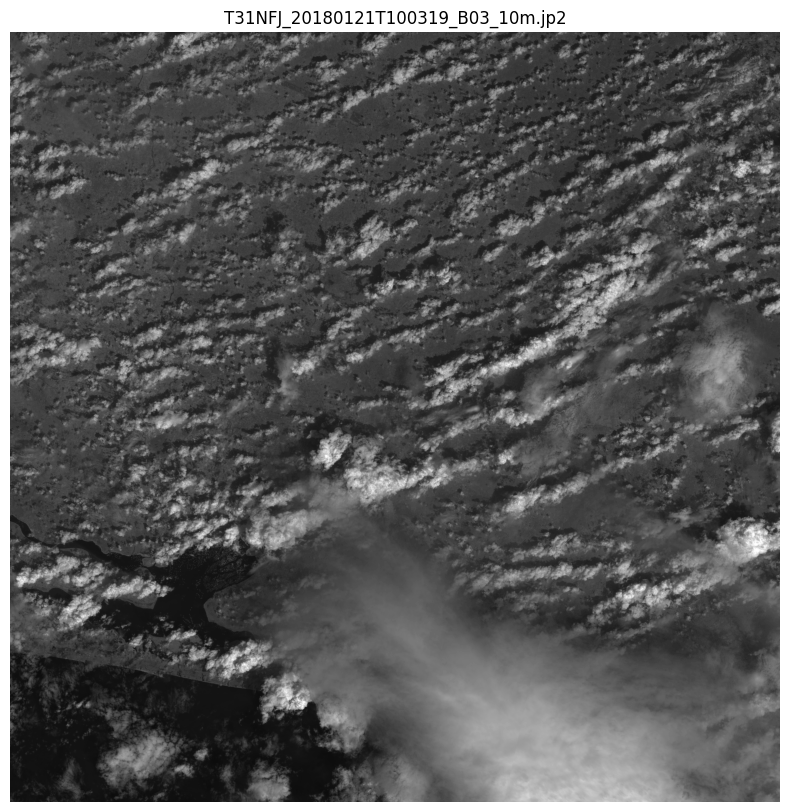

In [ ]:
# Import necessary library
import matplotlib.pyplot as plt
import rasterio

# Open the image
image_file = "/content/T31NFH_20211111T100149_B08_10m.jp2"

# Read the image data
with rasterio.open(image_file) as src:
    image_data = src.read(1)  # Read the first band

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(image_data, cmap='gray')  # Adjust cmap as needed
plt.title('T31NFJ_20180121T100319_B03_10m.jp2')
plt.axis('off')
plt.show()


In [ ]:
from google.colab import drive
# drive.mount('/content/drive')

!cp *.jp2 /content/drive/MyDrive/
# !cp *.tif /content/drive/MyDrive/

In [ ]:
# Polygon WKT
aoi_polygon_wkt = "POLYGON ((3.986664 6.848714, 3.986664 7.412857, 4.850464 7.412857, 4.850464 6.848714, 3.986664 6.848714)))"

# Convert WKT to a GeoPandas DataFrame
aoi_geom = loads(aoi_polygon_wkt)
aoi_gdf = gpd.GeoDataFrame({'geometry': [aoi_geom]})
aoi_gdf.crs = 'EPSG:4326'

# Open the mosaicked image
mosaicked_image = rasterio.open('mosaicked_image.tif')

# Clip the image using the GeoDataFrame
clipped_image, clipped_transform = mask(mosaicked_image, aoi_gdf.geometry, crop=True)


# Update metadata for the clipped image
clipped_meta = mosaicked_image.meta.copy()
clipped_meta.update({
    'driver': 'GTiff',
    'height': clipped_image.shape[1],
    'width': clipped_image.shape[2],
    'transform': clipped_transform
})

# Write the clipped image to a new file
with rasterio.open('clipped_image.tif', 'w', **clipped_meta) as dst:
    dst.write(clipped_image)

ValueError: Input shapes do not overlap raster.

In [ ]:
# prompt: generate a code to clip the mosaicked image







print("Clipped image saved to: /content/clipped_image.tif")
